In [11]:
!pip install -q pycaret
from pycaret.utils import enable_colab
enable_colab()
import pandas as pd
import logging
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)
csv_url='https://drive.google.com/uc?id=1anIKQhNkmch-hm5NqpFu9KOU2uTlmoxs'


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Colab mode enabled.


In [12]:
try:
  dataset = pd.read_csv(csv_url)
except Exception as e:
  logger.exception(e)

In [13]:
dataset.shape

(5110, 12)

In [14]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


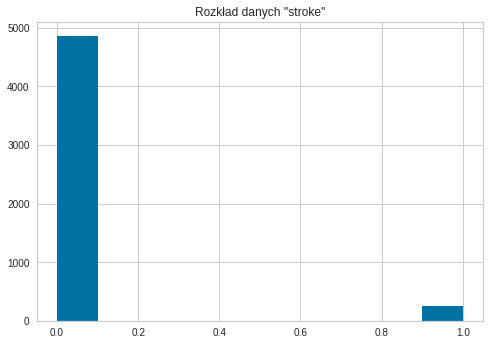

In [15]:
import matplotlib.pyplot as plt
plt.title('Rozkład danych "stroke"')
dataset['stroke'].hist()

In [16]:
data = dataset.sample(frac=0.8, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print(f'Dane treningowe: {data.shape}\nDane testowe: {data_unseen.shape}')

Dane treningowe: (4088, 12)
Dane testowe: (1022, 12)


In [17]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [18]:
from jinja2 import *

In [19]:
from pycaret.classification import *

In [20]:
exp1 = setup(data=data, target='stroke', session_id=121, silent=True)

,Description,Value
0,session_id,121
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4088, 12)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='stroke',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [21]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9483,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.034
dummy,Dummy Classifier,0.9483,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.015
knn,K Neighbors Classifier,0.9472,0.5353,0.0000,0.0000,0.0000,-0.0020,-0.0042,0.164
rf,Random Forest Classifier,0.9472,0.8160,0.0000,0.0000,0.0000,-0.0020,-0.0041,0.829
et,Extra Trees Classifier,0.9472,0.7934,0.0752,0.3583,0.1231,0.1107,0.1476,0.519
lr,Logistic Regression,0.9469,0.7504,0.0200,0.1167,0.0340,0.0283,0.0391,0.501
gbc,Gradient Boosting Classifier,0.9455,0.8403,0.0271,0.2167,0.0472,0.0380,0.0614,0.709
ada,Ada Boost Classifier,0.9451,0.8324,0.0333,0.2533,0.0571,0.0465,0.0740,0.368
lightgbm,Light Gradient Boosting Machine,0.9430,0.8141,0.0467,0.2583,0.0754,0.0602,0.0851,0.129
lda,Linear Discriminant Analysis,0.9395,0.8436,0.1224,0.2876,0.1690,0.1443,0.1593,0.025


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=121, solver='auto',
                tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


In [22]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.0,0.0,0.0,0.0,0.0,0.0
1,0.9510,0.0,0.0,0.0,0.0,0.0,0.0
2,0.9510,0.0,0.0,0.0,0.0,0.0,0.0
3,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
5,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
6,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
7,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
8,0.9476,0.0,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=121, solver='auto',
                tol=0.001)
INFO:logs:create_model() succesfully completed......................................


In [23]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9477,0.0,0.0,0.0,0.0,0.0,0.0
1,0.9510,0.0,0.0,0.0,0.0,0.0,0.0
2,0.9510,0.0,0.0,0.0,0.0,0.0,0.0
3,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
5,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
6,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
7,0.9476,0.0,0.0,0.0,0.0,0.0,0.0
8,0.9476,0.0,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RidgeClassifier(alpha=1.53, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=121, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [24]:
evaluate_model(tuned_ridge)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=1.53, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=121, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
final = finalize_model(tuned_ridge)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RidgeClassifier(alpha=1.53, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=121, solver='auto',
                tol=0.001), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RidgeClassifier(alpha=1.53, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=121, solver='auto',
                tol=0.001)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=RidgeClassifier(alpha=1.53, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=121, solver='auto',
                tol=0.001), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_cus

In [26]:
predict_model(final)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RidgeClassifier(alpha=1.53, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=121, solver='auto',
                tol=0.001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9544,0.5,0.0,0.0,0.0,0.0,0.0


,id,age,avg_glucose_level,bmi,gender_Female,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,Label
0,28348.0,46.00,106.470001,27.200001,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
1,36633.0,1.72,73.080002,20.400000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
2,38771.0,41.00,129.009995,42.400002,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
3,48964.0,21.00,105.470001,26.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,70429.0,33.00,84.480003,44.500000,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,10245.0,54.00,77.519997,35.799999,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1223,3673.0,55.00,112.470001,32.799999,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
1224,50371.0,56.00,63.180000,31.500000,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0
1225,58227.0,64.00,62.410000,30.000000,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [27]:
save_model(final, model_name='20220416')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RidgeClassifier(alpha=1.53, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=121, solver='auto',
                tol=0.001), model_name=20220416, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='stroke',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
    

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='stroke',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='stroke')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
         

In [28]:
!ls


20220416.pkl  logs.log	sample_data
